# Exploratory data analysis (EDA)

When performing an EDA try to follow a routine. Usually we'll need to perform the same tasks to find out how big the dataset is, the data types, distributions, spotting outliers, and decide wether the data is relavant or not. 

This time we'll load a large dataset on violence in Rio de Janeiro, Brazil. We'll focus on data about theft between 2016 and 2019. 

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
 
# Visualization config
sns.set_style()
%matplotlib inline

# We'll slice the dataset and select only a few rows and columns to work on.
df = pd.read_csv("./violencia_rio.csv")
df_theft = df.loc[300:df.shape[0],['vano',
                                   'mes',
                                   'furto_veiculos',
                                   'furto_transeunte',
                                   'furto_coletivo',
                                   'furto_celular',
                                   'furto_bicicleta',
                                   'outros_furtos']]

# Renaming columns
df_theft.rename(columns={'vano':'year',
                    'mes':'month',
                    'furto_veiculos':'theft_vehicle',
                    'furto_transeunte':'theft_pedestrian',
                    'furto_coletivo':'theft_public_transport',
                    'furto_celular':'theft_phone',
                    'furto_bicicleta':'theft_bicycle',
                    'outros_furtos':'theft_others'
                    },inplace=True)

df_theft


,year,month,theft_vehicle,theft_pedestrian,theft_public_transport,theft_phone,theft_bicycle,theft_others
300,2016,1,1515,3513,957.0,1741.0,147.0,8039
301,2016,2,1456,4047,829.0,1804.0,168.0,8255
302,2016,3,1409,2466,919.0,1514.0,173.0,7691
303,2016,4,1438,2074,849.0,1391.0,171.0,7110
304,2016,5,1541,2259,835.0,1322.0,197.0,7362
305,2016,6,1454,2212,831.0,1299.0,160.0,6778
306,2016,7,1300,2117,811.0,1370.0,148.0,7535
307,2016,8,1241,2509,956.0,1582.0,161.0,9502
308,2016,9,1281,2078,898.0,1554.0,193.0,7863
309,2016,10,1367,2058,839.0,1422.0,183.0,7834


In [126]:
df_theft.dtypes

year                        int64
month                       int64
theft_vehicle               int64
theft_pedestrian            int64
theft_public_transport    float64
theft_phone               float64
theft_bicycle             float64
theft_others                int64
dtype: object

Note how the month variable is numerical, however we shouldn't treat it as such. Month should be treated as a categorical variable, with which no mathematical operations are relevant (for example, if we sum 10 + 10 we'll get 20, but it doesn't make sense for this column). 

In [127]:
df_theft.month= pd.to_datetime(df_theft.month, format='%m').dt.strftime('%b')
df_theft.year= pd.to_datetime(df_theft.year, format='%Y').dt.strftime('%Y')
df_theft

,year,month,theft_vehicle,theft_pedestrian,theft_public_transport,theft_phone,theft_bicycle,theft_others
300,2016,Jan,1515,3513,957.0,1741.0,147.0,8039
301,2016,Feb,1456,4047,829.0,1804.0,168.0,8255
302,2016,Mar,1409,2466,919.0,1514.0,173.0,7691
303,2016,Apr,1438,2074,849.0,1391.0,171.0,7110
304,2016,May,1541,2259,835.0,1322.0,197.0,7362
305,2016,Jun,1454,2212,831.0,1299.0,160.0,6778
306,2016,Jul,1300,2117,811.0,1370.0,148.0,7535
307,2016,Aug,1241,2509,956.0,1582.0,161.0,9502
308,2016,Sep,1281,2078,898.0,1554.0,193.0,7863
309,2016,Oct,1367,2058,839.0,1422.0,183.0,7834


In [128]:
df_theft.dtypes

year                       object
month                      object
theft_vehicle               int64
theft_pedestrian            int64
theft_public_transport    float64
theft_phone               float64
theft_bicycle             float64
theft_others                int64
dtype: object

Now the columns 'year' and 'month' are no longer numerical data. If we run the describe function, these columns won't be displayed, as the describe function will only take into account the columns with numerical data. 

In [129]:
df_theft.describe().round(1)

,theft_vehicle,theft_pedestrian,theft_public_transport,theft_phone,theft_bicycle,theft_others
count,44.0,44.0,44.0,44.0,44.0,44.0
mean,1342.6,1889.9,716.4,1386.7,168.2,7312.0
std,82.7,558.9,138.6,228.4,33.1,946.2
min,1159.0,663.0,167.0,527.0,39.0,3089.0
25%,1287.0,1569.5,655.0,1301.2,150.8,6891.2
50%,1345.0,1763.0,734.0,1373.5,167.0,7361.5
75%,1395.0,2075.0,790.0,1519.0,183.5,7791.5
max,1541.0,4047.0,957.0,1889.0,243.0,9502.0


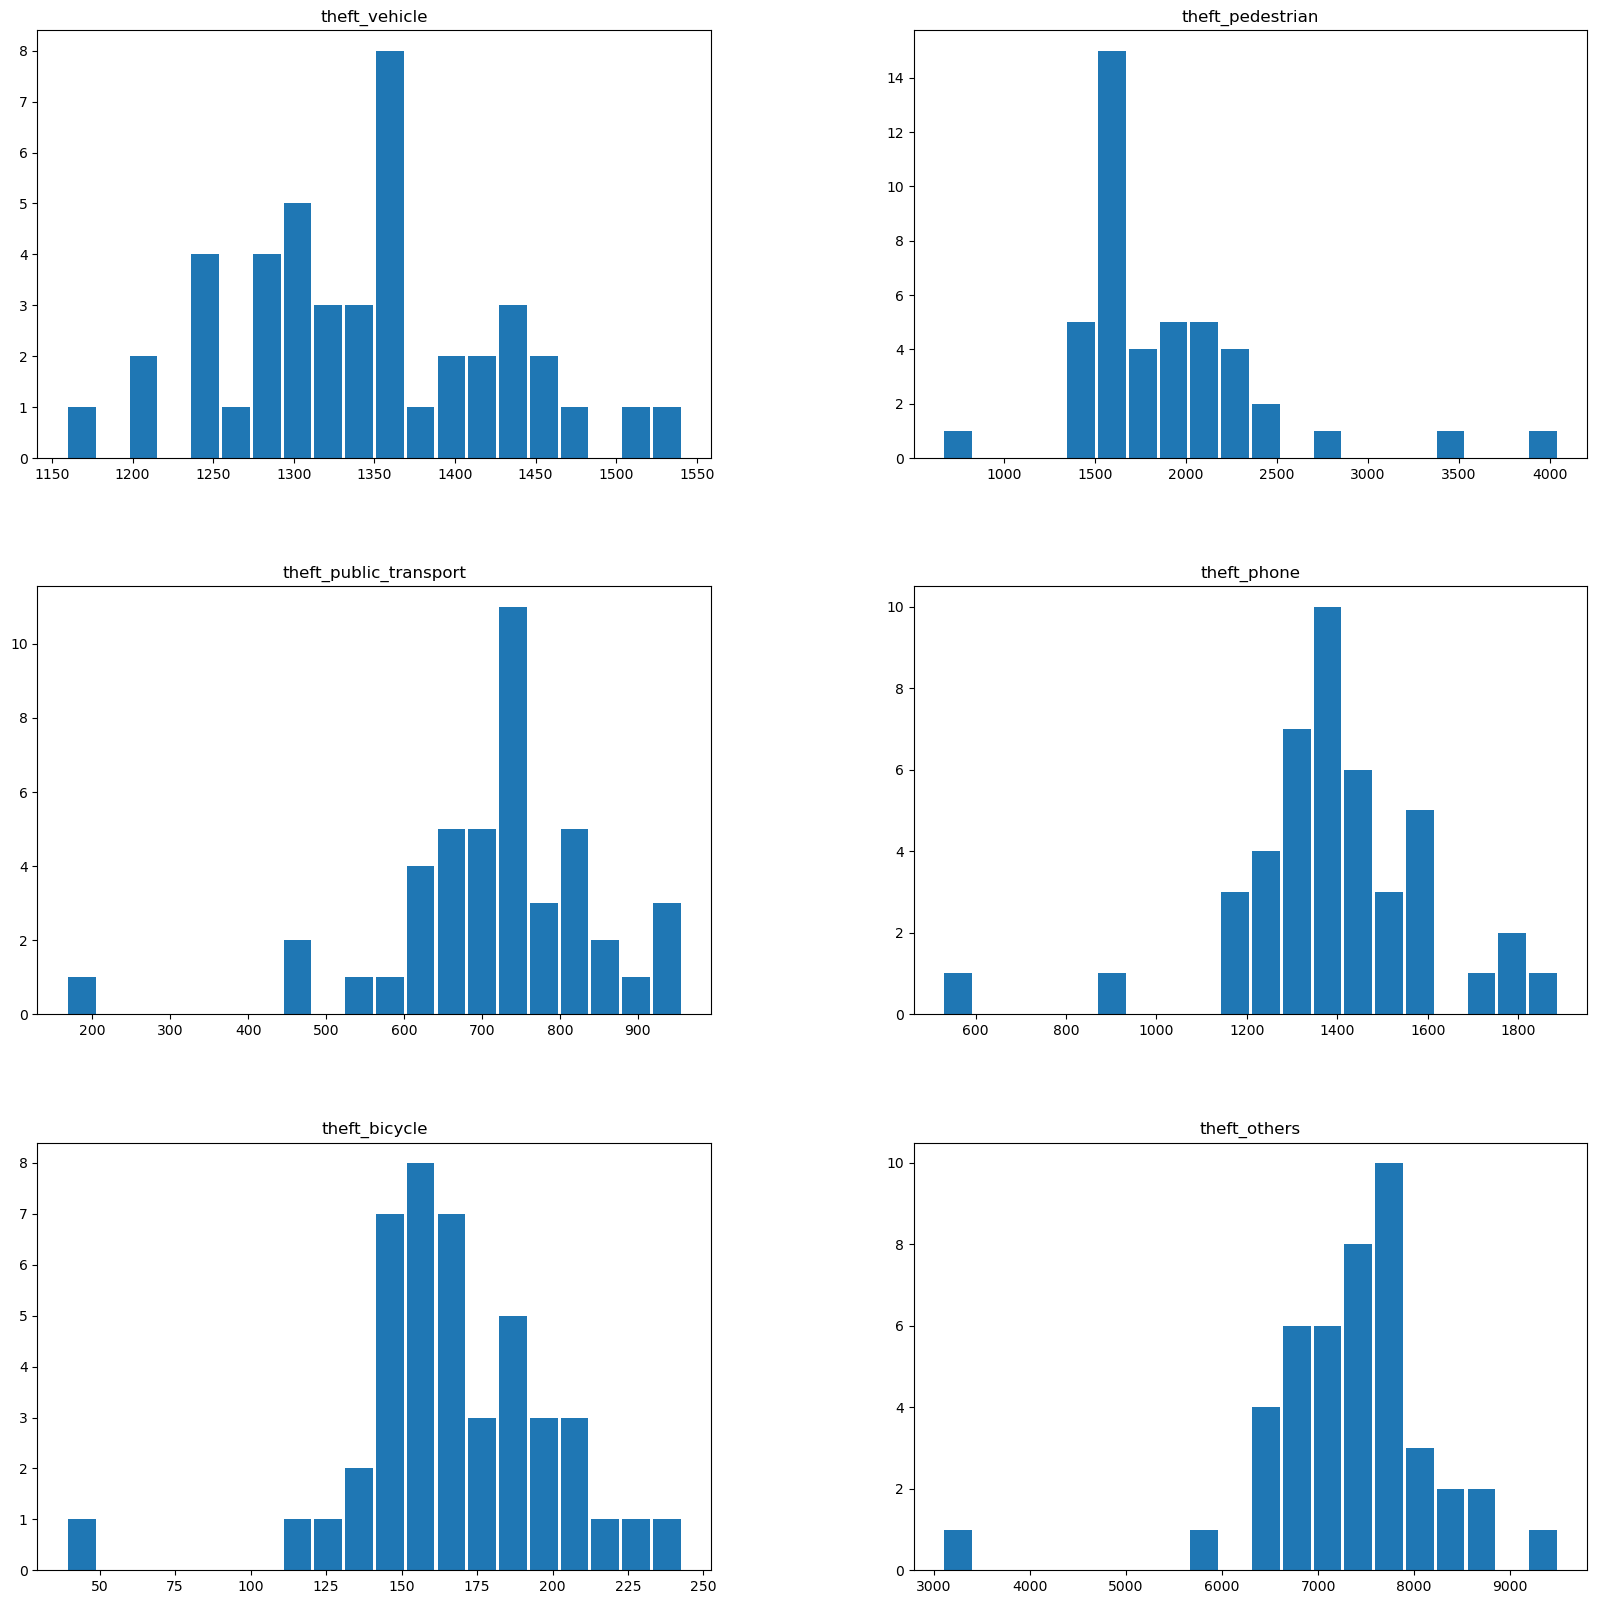

In [130]:
df_theft.hist(figsize=(20,20),grid=False,bins=20,rwidth=0.9);

In [131]:
# Sorting the data per year. 
df_theft_yearly = pd.DataFrame(df_theft.set_index('year').groupby(by='year',level=0).sum().drop(['month'],axis=1))
df_theft_yearly

,theft_vehicle,theft_pedestrian,theft_public_transport,theft_phone,theft_bicycle,theft_others
year,,,,,,
2016,16759,29275,10252.0,17574.0,2013.0,93365
2017,15708,19163,7541.0,15627.0,1924.0,85327
2018,15794,20440,8316.0,15718.0,1901.0,81701
2019,10812,14279,5411.0,12094.0,1563.0,61336


In [132]:
# Sorting the data per month and creating a new DataFrame.
df_theft_monthly = pd.DataFrame(df_theft.set_index('month').groupby(by='month',level=0).sum().drop(['year'],axis=1))
df_theft_monthly

,theft_vehicle,theft_pedestrian,theft_public_transport,theft_phone,theft_bicycle,theft_others
month,,,,,,
Apr,5317,6764,2777.0,5136.0,735.0,29054
Aug,5318,7384,3120.0,5758.0,691.0,31494
Dec,3929,5576,2033.0,3861.0,494.0,21768
Feb,5269,8926,2229.0,5522.0,481.0,25350
Jan,5551,9276,2821.0,5622.0,582.0,29254
Jul,5153,6974,2926.0,5545.0,683.0,29076
Jun,5366,6777,2852.0,5308.0,656.0,27764
Mar,5450,8382,2768.0,5973.0,683.0,31477
May,5684,7210,3146.0,5328.0,841.0,30440


In [133]:
# Selecting occurrences per month.
print("Thefts in January, between 2016 and 2019\n")
print(df_theft_monthly.loc['Jan'].astype('int64'),"\n")
print("Thefts in 2019\n")
print(df_theft_yearly.loc['2019'].astype('int64'))


Thefts in January, between 2016 and 2019

theft_vehicle              5551
theft_pedestrian           9276
theft_public_transport     2821
theft_phone                5622
theft_bicycle               582
theft_others              29254
Name: Jan, dtype: int64 

Thefts in 2019

theft_vehicle             10812
theft_pedestrian          14279
theft_public_transport     5411
theft_phone               12094
theft_bicycle              1563
theft_others              61336
Name: 2019, dtype: int64


In [134]:
# Selecting the month with the most amount of vehicle thefts between 2016 and 2019
df_theft_monthly.loc[df_theft_monthly.theft_vehicle == df_theft_monthly.theft_vehicle.max()]

,theft_vehicle,theft_pedestrian,theft_public_transport,theft_phone,theft_bicycle,theft_others
month,,,,,,
May,5684,7210,3146.0,5328.0,841.0,30440


In [135]:
# Selecting the year in which the most amount of phones were stolen.
df_theft_yearly.loc[df_theft_yearly.theft_phone == df_theft_yearly.theft_phone.max()]

,theft_vehicle,theft_pedestrian,theft_public_transport,theft_phone,theft_bicycle,theft_others
year,,,,,,
2016,16759,29275,10252.0,17574.0,2013.0,93365
